In [ ]:
conda install matplotlib


In [ ]:
conda install seaborn

In [ ]:
conda install scikit-learn

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Getting dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Analyzing the dataset

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
# only for the object datatype

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


My observation: 
- There are 681 tickets for 891 passengers
- There are 147 unique cabin for 204

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.groupby(['Pclass'], as_index= False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df.groupby(['Sex'], as_index= False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df.groupby(['SibSp'], as_index= False)['Survived'].mean()

In [11]:
train_df.groupby(['Parch'], as_index= False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

***New version of seaborn uses height in place of size***

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Adding FamilySize new feature

In [13]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [14]:
train_df.groupby(['Family_Size'], as_index= False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [15]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5:'Medium', 6:'Medium', 7: 'Large', 8:'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

In [16]:
train_df.groupby(['Family_Size_Grouped'], as_index= False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.222222
2,Medium,0.162162
3,Small,0.578767


In [17]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'],8)
test_df['Age_Cut'] = pd.qcut(train_df['Age'],8)

In [18]:
train_df.groupby(['Age_Cut'], as_index= False)['Survived'].mean()

C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\2498087688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index= False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [19]:
train_df.loc[train_df['Age']<=16, 'Age'] = 0
train_df.loc[(train_df['Age']>16) & (train_df['Age']<=20.125), 'Age'] = 1
train_df.loc[(train_df['Age']>20.125) & (train_df['Age']<=24.0), 'Age'] = 2
train_df.loc[(train_df['Age']>24.0) & (train_df['Age']<=28.0), 'Age']=3
train_df.loc[(train_df['Age']>28.0) & (train_df['Age']<=32.312), 'Age']=4
train_df.loc[(train_df['Age']>32.312) & (train_df['Age']<=38.0), 'Age']=5
train_df.loc[(train_df['Age']>38.0)& (train_df['Age']<=47.0), 'Age']=6
train_df.loc[(train_df['Age']>47.0) & (train_df['Age']<=80.0), 'Age']=7

test_df.loc[test_df['Age']<=16, 'Age']=0
test_df.loc[(test_df['Age']>16) & (test_df['Age']<=20.125), 'Age']=1
test_df.loc[(test_df['Age']>20.125) & (test_df['Age']<=24.0), 'Age']=2
test_df.loc[(test_df['Age']>24.0) & (test_df['Age']<=28.0), 'Age']=3
test_df.loc[(test_df['Age']>28.0) & (test_df['Age']<=32.312), 'Age']=4
test_df.loc[(test_df['Age']>32.312) & (test_df['Age']<=38.0), 'Age']=5
test_df.loc[(test_df['Age']>38.0)& (test_df['Age']<=47.0), 'Age']=6
test_df.loc[(test_df['Age']>47.0) & (test_df['Age']<=80.0), 'Age']=7

In [20]:
train_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Alone,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,7.0,0,0,17463,51.8625,E46,S,1,Alone,"(47.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,NaN,S,5,Medium,"(0.419, 16.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3.0,0,2,347742,11.1333,NaN,S,3,Small,"(24.0, 28.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,1,0,237736,30.0708,NaN,C,2,Small,"(0.419, 16.0]"


In [21]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'],8)
test_df['Fare_Cut'] = pd.qcut(train_df['Fare'],8)

In [23]:
train_df.groupby(['Fare_Cut'], as_index= False)['Survived'].mean()

C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\34688846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index= False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [24]:
train_df.loc[train_df['Fare'] <= 7.854, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.854) & (train_df['Fare'] <= 10.5), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 10.5) & (train_df['Fare'] <= 21.679), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 21.679) & (train_df['Fare'] <= 39.688), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 39.688) & (train_df['Fare'] <= 512.329), 'Fare'] = 4
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] 

test_df.loc[test_df['Fare'] <= 7.854, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.854) & (test_df['Fare'] <= 10.5), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 10.5) & (test_df['Fare'] <= 21.679), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 21.679) & (test_df['Fare'] <= 39.688), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 39.688) & (test_df['Fare'] <= 512.329), 'Fare'] = 4
test_df.loc[test_df['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [25]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [27]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [28]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [29]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [30]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

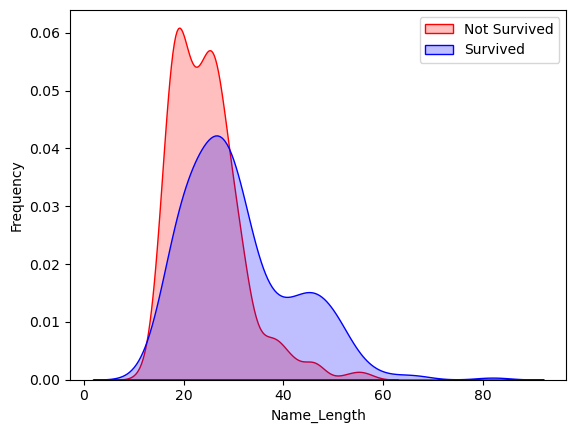

In [36]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])
plt.show()

In [37]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 3)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 3)

In [38]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [39]:
train_df.loc[train_df['Name_Length'] <= 22, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 22) & (train_df['Name_Length'] <= 28), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 28) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 2
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size'] 

test_df.loc[test_df['Name_Length'] <= 22, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 22) & (test_df['Name_Length'] <= 28), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 28) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 2
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,0,3,male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.75]",Mr,23,"(22.0, 28.0]",1.0
1,1,1,female,5.0,1,0,PC 17599,4.0,C85,C,2,Small,"(32.312, 38.0]","(69.488, 512.329]",Mrs,51,"(28.0, 82.0]",2.0
2,1,3,female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.91, 9.841]",Miss,22,"(11.999, 22.0]",0.0
3,1,1,female,5.0,1,0,113803,4.0,C123,S,2,Small,"(32.312, 38.0]","(31.0, 69.488]",Mrs,44,"(28.0, 82.0]",2.0
4,0,3,male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.91, 9.841]",Mr,24,"(22.0, 28.0]",1.0


In [41]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [42]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [43]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [44]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [45]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [46]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [47]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [48]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [49]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [50]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [51]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [52]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [53]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [54]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [55]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,0,3,male,2.0,1,0,A/5 21171,0.0,U,S,...,"(20.125, 24.0]","(-0.001, 7.75]",Mr,23,"(22.0, 28.0]",1.0,21171,1,A/5,0
1,1,1,female,5.0,1,0,PC 17599,4.0,C,C,...,"(32.312, 38.0]","(69.488, 512.329]",Mrs,51,"(28.0, 82.0]",2.0,17599,1,PC,1
2,1,3,female,3.0,0,0,STON/O2. 3101282,1.0,U,S,...,"(24.0, 28.0]","(7.91, 9.841]",Miss,22,"(11.999, 22.0]",0.0,3101282,1,STON/O2.,0
3,1,1,female,5.0,1,0,113803,4.0,C,S,...,"(32.312, 38.0]","(31.0, 69.488]",Mrs,44,"(28.0, 82.0]",2.0,113803,2,Blank,1
4,0,3,male,5.0,0,0,373450,1.0,U,S,...,"(32.312, 38.0]","(7.91, 9.841]",Mr,24,"(22.0, 28.0]",1.0,373450,1,Blank,0


In [56]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\623714052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\623714052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [58]:
# This must be run first (or in a previous cell)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Now this code will work without a NameError
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy='most_frequent')

In [59]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

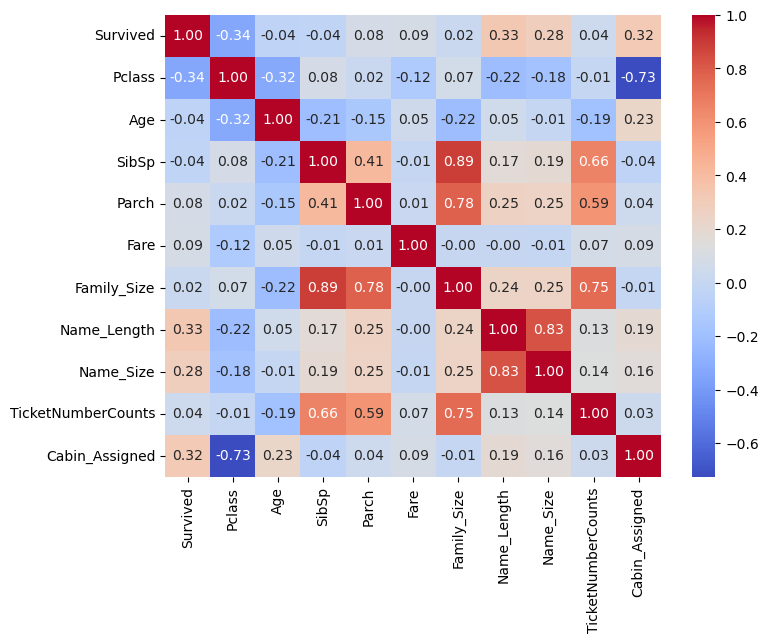

In [62]:
correlation_matrix = train_df.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

In [63]:
X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

In [33]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 16), (418, 16))

In [68]:
train_df['Sex'] = train_df['Sex'].replace({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1})

C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\3747456529.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Sex'] = test_df['Sex'].replace({'male': 0, 'female': 1})


In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

We can create another feature called IsAlone.

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

We can also create an artificial feature combining Pclass and Age.

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

In [69]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,892,3,0,5.0,0,0,330911,0.0,U,Q,...,"(20.125, 24.0]","(-0.001, 7.75]",Mr,16,"(12.999, 22.0]",0.0,330911,1,Blank,0
1,893,3,1,6.0,1,0,363272,0.0,U,S,...,"(32.312, 38.0]","(69.488, 512.329]",Mrs,32,"(28.0, 63.0]",2.0,363272,1,Blank,0
2,894,2,0,7.0,0,0,240276,1.0,U,Q,...,"(24.0, 28.0]","(7.91, 9.841]",Mr,25,"(22.0, 28.0]",1.0,240276,1,Blank,0
3,895,3,0,3.0,0,0,315154,1.0,U,S,...,"(32.312, 38.0]","(31.0, 69.488]",Mr,16,"(12.999, 22.0]",0.0,315154,1,Blank,0
4,896,3,1,2.0,1,1,3101298,2.0,U,S,...,"(32.312, 38.0]","(7.91, 9.841]",Mrs,44,"(28.0, 63.0]",2.0,3101298,1,Blank,0
5,897,3,0,0.0,0,0,7538,1.0,U,S,...,NaN,"(7.91, 9.841]",Mr,26,"(22.0, 28.0]",1.0,7538,1,Blank,0
6,898,3,1,4.0,0,0,330972,0.0,U,Q,...,"(47.0, 80.0]","(31.0, 69.488]",Miss,20,"(12.999, 22.0]",0.0,330972,1,Blank,0
7,899,2,0,3.0,1,1,248738,3.0,U,S,...,"(0.419, 16.0]","(14.454, 24.479]",Mr,28,"(22.0, 28.0]",1.0,248738,1,Blank,0
8,900,3,1,1.0,0,0,2657,0.0,U,C,...,"(24.0, 28.0]","(9.841, 14.454]",Mrs,41,"(28.0, 63.0]",2.0,2657,1,Blank,0
9,901,3,0,2.0,2,0,A/4 48871,3.0,U,S,...,"(0.419, 16.0]","(24.479, 31.0]",Mr,23,"(22.0, 28.0]",1.0,48871,1,A/4,0


In [72]:
# List of columns to DROP
columns_to_drop = [
    'PassengerId',  # Pure identifier, not predictive
    'Ticket',       # You've already engineered better features from this (TicketNumber, etc.)
    'Cabin',        # You've already created 'Cabin_Assigned' which is a better binary version
    'Name',         # You've already extracted the 'Title'. The raw name is noise.
    'Age',          # You have 'Age_Cut' which is a more robust, binned version.
    'Fare',         # You have 'Fare_Cut' which is a more robust, binned version.
    'Name_Length',  # You have 'Name_LengthGB' which is a binned version.
]

# Drop the columns from your training and test sets
df_clean_train = train_df.drop(columns=columns_to_drop, errors='ignore')
df_clean_test = test_df.drop(columns=columns_to_drop, errors='ignore')

In [73]:
print(df_clean_train[['SibSp', 'Parch', 'Name_Size']].corr())

              SibSp     Parch  Name_Size
SibSp      1.000000  0.414838    0.18654
Parch      0.414838  1.000000    0.24638
Name_Size  0.186540  0.246380    1.00000


In [74]:
df_clean_train.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,0,3,0,1,0,S,2,Small,"(20.125, 24.0]","(-0.001, 7.75]",Mr,"(22.0, 28.0]",1.0,21171,1,A/5,0
1,1,1,1,1,0,C,2,Small,"(32.312, 38.0]","(69.488, 512.329]",Mrs,"(28.0, 82.0]",2.0,17599,1,PC,1
2,1,3,1,0,0,S,1,Alone,"(24.0, 28.0]","(7.91, 9.841]",Miss,"(11.999, 22.0]",0.0,3101282,1,STON/O2.,0
3,1,1,1,1,0,S,2,Small,"(32.312, 38.0]","(31.0, 69.488]",Mrs,"(28.0, 82.0]",2.0,113803,2,Blank,1
4,0,3,0,0,0,S,1,Alone,"(32.312, 38.0]","(7.91, 9.841]",Mr,"(22.0, 28.0]",1.0,373450,1,Blank,0


In [76]:
columns_to_drop = [
    'SibSp', 
    'Parch', 
    'Family_Size', 
    'Name_Size',
    'TicketNumber' # Keep TicketNumberCounts and TicketLocation
]
df_clean_train = train_df.drop(columns=columns_to_drop, errors='ignore')
df_clean_test = test_df.drop(columns=columns_to_drop, errors='ignore')

In [80]:
df_clean_train.head(5)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,0,3,0,2.0,A/5 21171,0.0,U,3.0,Small,"(20.125, 24.0]","(-0.001, 7.75]",Mr,23,"(22.0, 28.0]",1,A/5,0
1,1,1,1,5.0,PC 17599,4.0,C,1.0,Small,"(32.312, 38.0]","(69.488, 512.329]",Mrs,51,"(28.0, 82.0]",1,PC,1
2,1,3,1,3.0,STON/O2. 3101282,1.0,U,3.0,Alone,"(24.0, 28.0]","(7.91, 9.841]",Miss,22,"(11.999, 22.0]",1,STON/O2.,0
3,1,1,1,5.0,113803,4.0,C,3.0,Small,"(32.312, 38.0]","(31.0, 69.488]",Mrs,44,"(28.0, 82.0]",2,Blank,1
4,0,3,0,5.0,373450,1.0,U,3.0,Alone,"(32.312, 38.0]","(7.91, 9.841]",Mr,24,"(22.0, 28.0]",1,Blank,0


In [98]:
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
# Apply the mapping to the training set
df_clean_train['Embarked'] = df_clean_train['Embarked'].map(embarked_mapping)

# Apply the SAME mapping to the test set
df_clean_test['Embarked'] = df_clean_test['Embarked'].map(embarked_mapping)

In [121]:
columns_to_drop = [
    'Ticket', 
    'Cabin', 
    'Age_Cut', 
    'Fare_Cut',
    'Name_LengthGB',
    'TicketNumber',
    'Family_Size_Grouped',
    'Title',
    'TicketLocation'
]
df_clean_train = df_clean_train.drop(columns=columns_to_drop, errors='ignore')
df_clean_test = df_clean_test.drop(columns=columns_to_drop, errors='ignore')

In [122]:
df_clean_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Name_Length,Name_Size,TicketNumberCounts,Cabin_Assigned
0,0,3,0,2.0,1,0,0.0,3.0,2,23,1.0,1,0
1,1,1,1,5.0,1,0,4.0,1.0,2,51,2.0,1,1
2,1,3,1,3.0,0,0,1.0,3.0,1,22,0.0,1,0
3,1,1,1,5.0,1,0,4.0,3.0,2,44,2.0,2,1
4,0,3,0,5.0,0,0,1.0,3.0,1,24,1.0,1,0


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [123]:
X_train = df_clean_train.drop("Survived", axis=1)
Y_train = df_clean_train["Survived"]
X_test  = df_clean_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [128]:
embarked_mode = X_train['Embarked'].mode()[0]
print(f"The most frequent 'Embarked' value is: {embarked_mode}")
X_train['Embarked'].fillna(embarked_mode, inplace=True)
X_test['Embarked'].fillna(embarked_mode, inplace=True)

The most frequent 'Embarked' value is: 3.0


C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\1325505973.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Embarked'].fillna(embarked_mode, inplace=True)
C:\Users\RAJARATHINAM\AppData\Local\Temp\ipykernel_38512\1325505973.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [129]:
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Check for missing values in your test features
print("\nMissing values in X_test:")
print(X_test.isnull().sum())

Missing values in X_train:
Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked              0
Family_Size           0
Name_Length           0
Name_Size             0
TicketNumberCounts    0
Cabin_Assigned        0
dtype: int64

Missing values in X_test:
Pclass                0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Embarked              0
Family_Size           0
Name_Length           0
Name_Size             0
TicketNumberCounts    0
Cabin_Assigned        0
dtype: int64


In [130]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.58

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [131]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.392401
11,Age_Cut,0.664618
5,Ticket,0.255345
9,Family_Size,0.169697
8,Embarked,0.025647
10,Family_Size_Grouped,0.011419
4,Parch,-0.014947
3,SibSp,-0.212416
2,Age,-0.212813
7,Cabin,-0.235745


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [132]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

70.03

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [133]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.75

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [134]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.86

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [135]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

61.95

In [136]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.03

In [137]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.25

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [138]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [139]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [140]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
1,KNN,85.75
7,Linear SVC,81.03
2,Logistic Regression,80.58
6,Stochastic Gradient Decent,80.25
4,Naive Bayes,74.86
0,Support Vector Machines,70.03
5,Perceptron,61.95


In [141]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

- [A journey through Titanic](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic)
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)
- [Titanic Best Working Classifier](https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier)